<a href="https://colab.research.google.com/github/falla055/ds_salaries_2023_eda/blob/assignment_1/4142Assignment1_300254333_300146250.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group 26

Connor States - 300254333

Felix Allard - 300146250


# **Introduction**  
  
The goal of this report is to present our findings from an analysis of two distinct datasets: the Heart Failure Prediction Dataset and the Data Science Salaries 2023 Dataset. The purpose of this analysis is to uncover valuable insights related to heart failure prediction factors and salary trends within the data science field, providing meaningful conclusions that can benefit both the general population (or those concerned with Heart Health) and individuals working or aspiring to work in the data science industry.

The audience for this report includes data analysts, researchers, and the public who are interested in understanding critical factors influencing heart disease predictions and salary distributions within the data science field. By using both statistical analysis and data visualization techniques, this report aims to communicate the insights clearly, with the intention of helping stakeholders make informed decisions based on the findings.

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
import os

#**Dataset 1: Heart Failure Prediction Dataset**

This dataset and subsequent analysis serve to offer insights about Heart Disease Risk Factors. The attributes below all affect an individuals cardiovascular risk level in different ways. The data is sourced from 5 seperate datasets which are the Cleveland, Hungarian, Switzerland, Long Beach VA and Stalog Data Set. Ideally this dataset would be implemented in training a machine learning model to assist with early detection and preventative or management purposes.

In [ ]:
# Loading the dataset into a pandas Dataframe
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")
file_path = os.path.join(path, 'heart.csv')
Heart_data = pd.read_csv(file_path)

100%|██████████| 8.56k/8.56k [00:00<00:00, 3.12MB/s]

Extracting files...


In [ ]:
Heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


The Dataset contains 918 rows with 12 columns

The 12 features are
1. Age (Continuous): Heart Disease Risk increases greatly with Age

2. Sex (Ordinal): Male or Female, Male's suffer from increased risks of Heart Disease earlier in life

3. Chest Pain Type (Ordinal): Type of chest pain suffered previously, TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic.

4. Resting Blood Pressure (Continuous): Blood Pressure in mmHG, high blood pressure increases risk

5. Cholesterol (Continuous): mg/dL, higher cholesterol can cause heart disease or strokes

6. Fasting Blood Sugar (Discrete): 1 if fasting blood sugar is > 120 mg/dL, can be an indicator of Diabetes which increases Heart Disease Risk

7. Resting ECG (Nominal): Normal, ST and LVH, ST shows ST-T wave abnormalities and LVH indicates probable left ventrical hypertrophy, both of these especially the latter increase risk of heart disease.

8. Max Heart Rate (Continuous): Max Heart rate achieved, higher could indicate more risk, values between 60 and 202

9. Exercise Angina (Nominal): Yes or no indicating whether Angina was induced due to exercise

10. Old peak (Continuous): A measurement of ST depression induced by exercise relative to rest, higher depression indicates higher risk of Heart Disease.

11. ST Slope (Continuous): Steeper slopes (up or down) can indicate myocardial ischemia, flatter slopes can indicate heart disease.

12. Heart Disease (Discrete): The target variable indicating if this entry actually suffered from Heart Disease.

In [ ]:
for col in Heart_data.columns:
  print(col)
  print(Heart_data[col].unique())

Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Sex
['M' 'F']
ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312

No cleaning necessary and no redundant or missing data

Descriptions

In [ ]:
Heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#**Dataset Visualizations**

**1. Over 70% of the records in the Age distribution fall over 50 years old**

The visualization below shows the result of Univariate numerical analysis (r1). Each bin shown is a 5 year span, the count for frequency is presented in percentages of the record count. This distribution could affect the ability to train a predictive model if age isn't weighted heavily enough. According to the american National Library of Medicine the incidence of cardiovascular disease is ~40% from 40-59 and upwards of ~75% from 60 on.



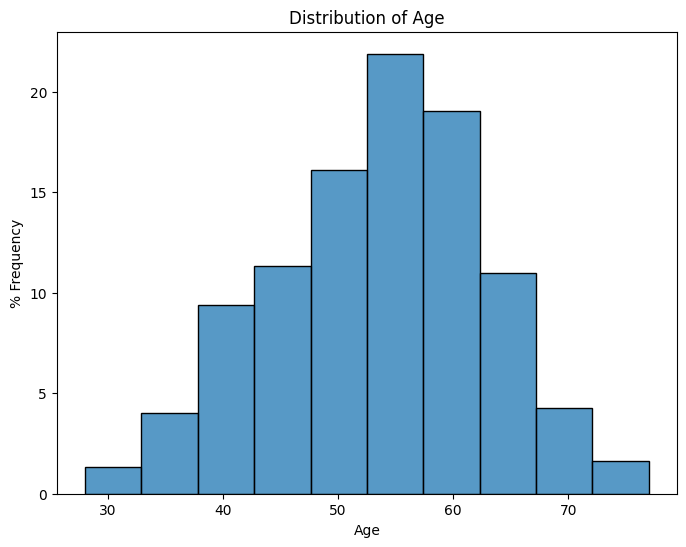

In [ ]:
# Building the chart
plt.figure(figsize=(8, 6))
sns.histplot(Heart_data['Age'], stat='percent', binwidth=5)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('% Frequency')
plt.show()

**2. 80% of the Sex distribution is Male**

For this visualization Univariate categorical analysis (r2) was used. The counts are displayed in percentages and we can see that 80% of the records are male. This again could affect the dataset as incidences of Heart Disease are higher in men than women.

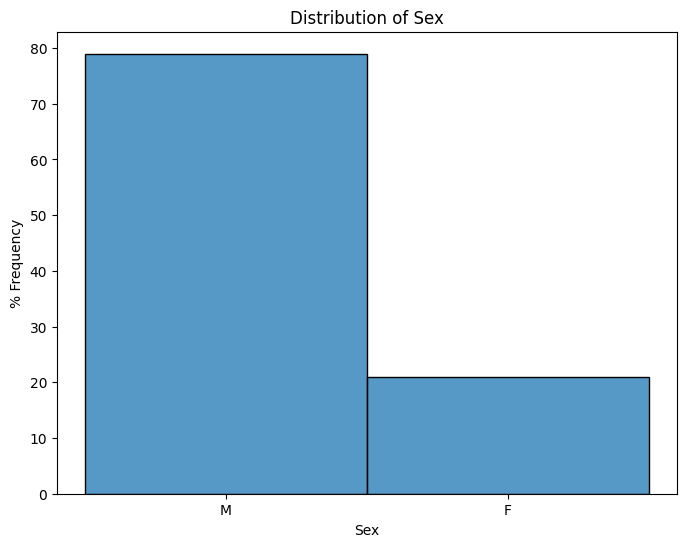

In [ ]:
# Building the chart
plt.figure(figsize=(8, 6))
sns.histplot(Heart_data['Sex'], stat='percent')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('% Frequency')
plt.show()

**3. This dataset's Asymptomatic Chest pain records have a disproportionately high rate of heart disease compared to other forms of chest pain**

Bivariate Numerical Discrete and Categorical analysis (r5) was used to produce the following visualization. The bins are organized by chest pain type with the total count representing the records that do or don't have heart disease. It is evident that, in this dataset, asymptomatic chest pain has a the highest proportion of being positive for heart disease.

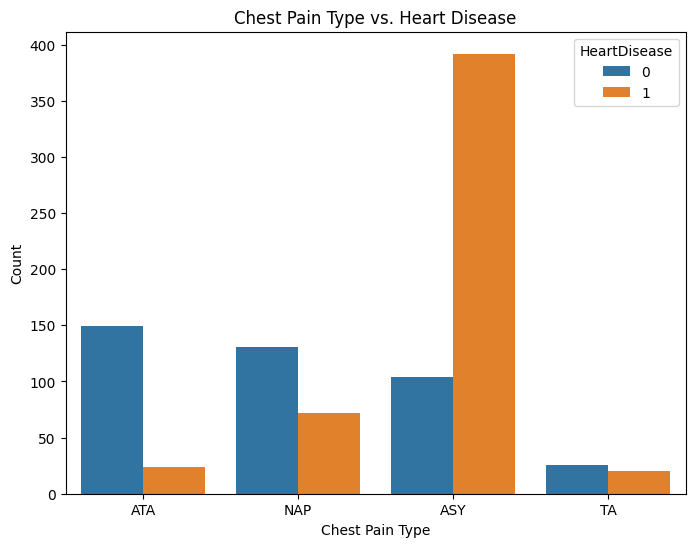

In [ ]:
# Building the chart
plt.figure(figsize=(8, 6))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=Heart_data)
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

**4. This Dataset indicates Exercise Angina is a good indicator of heart disease**

Bivariate categorical/categorical analysis (r4)was used to produce this visualization when comparing the presence of exercise angine with the presence of heart disease in participants. Although the overall counts of records without Exercise Angina are higher, those with show heart disease at a disproportionately high rate. The high counts of heart disease in the N bin can be explained by other factors.

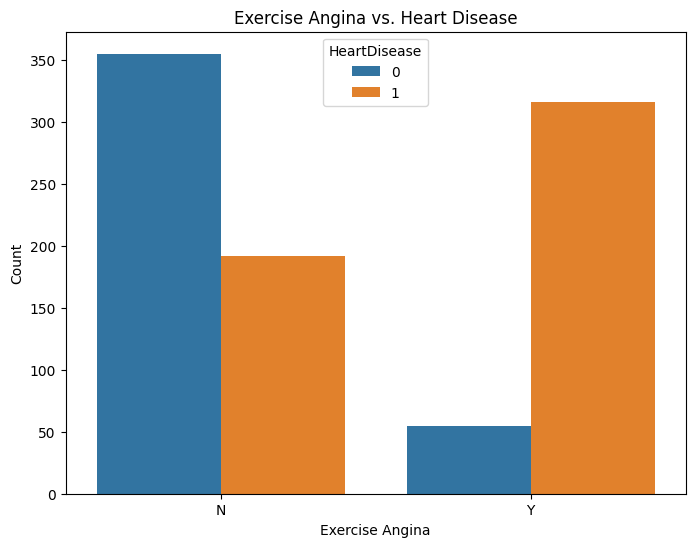

In [ ]:
# Building the chart
plt.figure(figsize=(8, 6))
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=Heart_data)
plt.title('Exercise Angina vs. Heart Disease')
plt.xlabel('Exercise Angina')
plt.ylabel('Count')
plt.show()

**5. Records with Flat ST Slopes have a higher count of Heart Disease**

Bivariate analysis Numerical/Categorical analysis (r5) here, the binning is grouped into the categories of ST Slopes with the counts of heart disease within each as the Y axis. There are very few downward slopes in general so it's hard to glean information from them. However, the upward and flat slopes have similar counts and are mirrors of each other indicating flat slopes are associated at a higher rate with Heart Disease

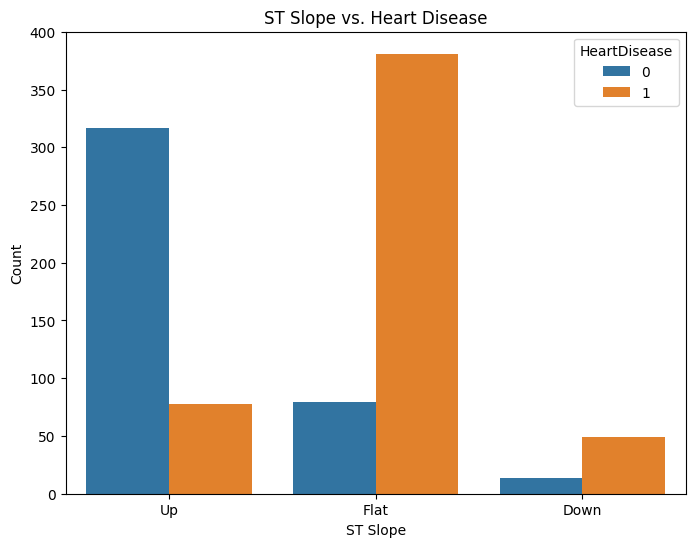

In [ ]:
# Building the chart
plt.figure(figsize=(8, 6))
sns.countplot(x='ST_Slope', hue='HeartDisease', data=Heart_data)
plt.title('ST Slope vs. Heart Disease')
plt.xlabel('ST Slope')
plt.ylabel('Count')
plt.show()

**6. In this dataset, Exercise Angina is present at a higher rate in men**

Bivariate analysis Categorical/Categorical (r4), the counts of exercise angina for men total 725 with ~45% suffering from Exercise Angina. The totals for women are 193 with ~22% suffering from Exercise Angina.

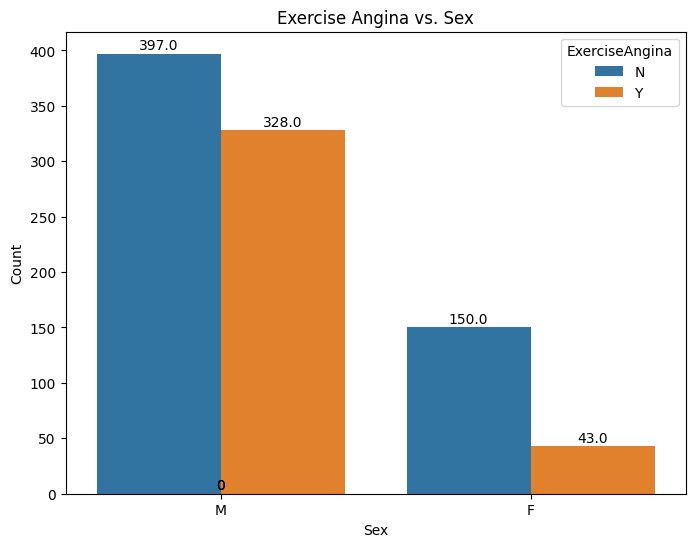

In [ ]:
# Building the chart
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', hue='ExerciseAngina', data=Heart_data, stat='count')
plt.title('Exercise Angina vs. Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Label the bars with the count of value
for p in ax.patches:
  count = f'{p.get_height()}\n'
  x = p.get_x() + p.get_width() / 2
  y = p.get_height()
  ax.annotate(count, (x, y), ha='center', va='center')
plt.show()

**7. Age and Max Heart Rate Have a weak negative correlation**

Bivariate Analysis Numerical/Numerical (r6) was used to produce a scatterplot with a regression line to indicate correlation. This regression line indicates a weak negative correlation between Age and Max Heart Rate (another indicator of good heart health) meaning that as Age progresses, the Max Heart Rate measured in the dataset tend to get lower.

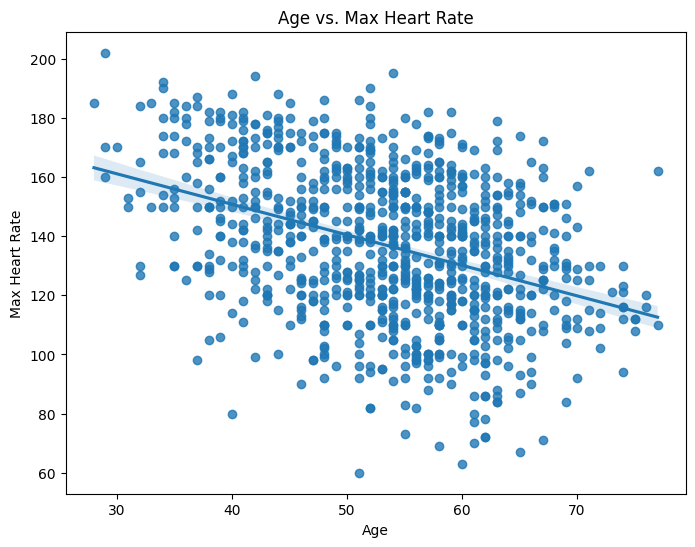

In [ ]:
# Building the chart
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='MaxHR', data=Heart_data)
plt.title('Age vs. Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()

**8. Non Asymptomatic chest pains and steeper ST Slopes are closely correlated**

The following visualization was made using bivariate categorical/categorical analysis with the counts of chest pains associated with each available category of ST_Slope (r3). The bins are divided by the chest pain type, we can see that Asymptomatic chest pain records have mostly flat ST Slopes whereas other chest pain types have more Down and Up slopes than flat.

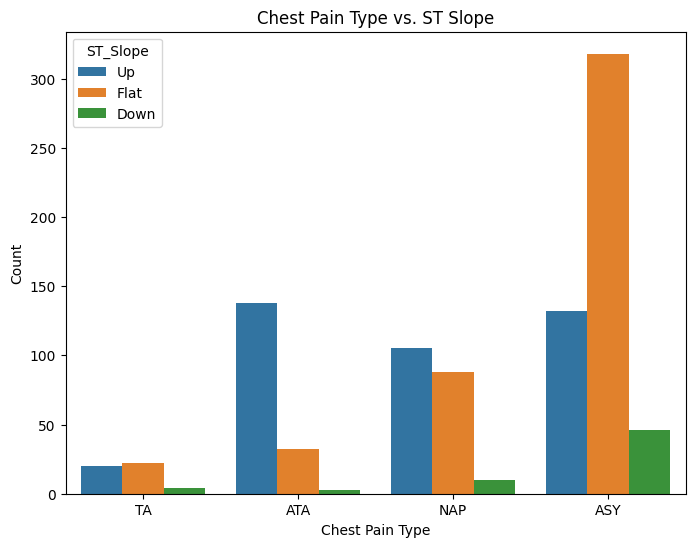

In [ ]:
order = ['TA', 'ATA', 'NAP', 'ASY']  # ordered alphabetically
# Building the chart
plt.figure(figsize=(8, 6))
sns.countplot(x='ChestPainType', hue='ST_Slope', data=Heart_data, order=order)
plt.title('Chest Pain Type vs. ST Slope')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

**9. Cholesterol is higher with lower variance in women**

Bivariate analysis Numerical/Categorical (r7) was used to produce the two box and whisker plots (one for each gender) below, representing the central tendencies of Cholesterol levels in men and women. Overall cholesterol seems to be lower with a larger variance for men with some outliers in the higher range.

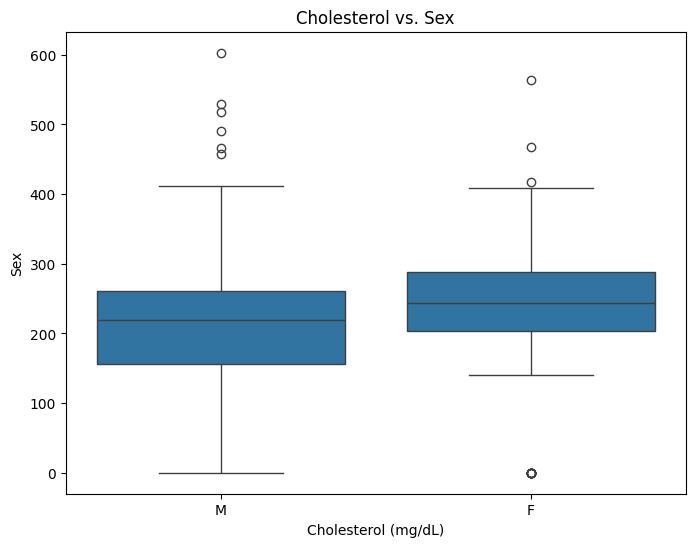

In [ ]:
# Building the chart
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Cholesterol', data=Heart_data)
plt.title('Cholesterol vs. Sex')
plt.xlabel('Cholesterol (mg/dL)')
plt.ylabel('Sex')
plt.show()

**10. The ages of those with Heart Disease are higher with a smaller variance on average in this dataset**

Bivariate analysis Numerical/Categorical (r7) was used to produce the two box and whisker plots (one for each discrete value representing Heart Disease) below to represent the central tendencies of the age of the participants and the presence (or not) of heart disease. Overall the ages of those without heart disease are lower and the ages of those with heart disease are higher (save some outliers).

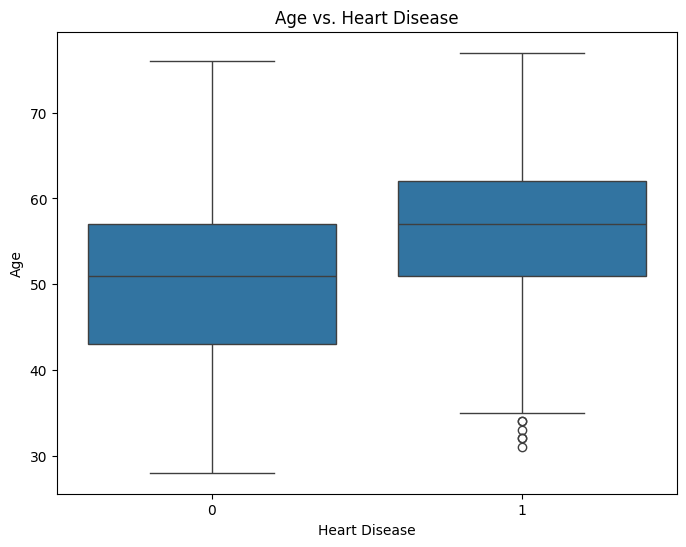

In [ ]:
# Building the chart
plt.figure(figsize=(8, 6))
sns.boxplot(x='HeartDisease', y='Age', data=Heart_data)
plt.title('Age vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

# **Dataset 2 - Data Science Salaries 2023**

This dataset is called the 'Data Science Salaries 2023' dataset. Here is the link for its Kaggle information page: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023. The author of the dataset is Kaggle user 'randomarnab' and they sourced the data from aijobs.net which is a job site specifically for jobs in AI and Data Science related fields. It also keeps data on the salaries of some jobs in those same fields which is the origin of the dataset in question.
  
The **shape** of the dataset is 3755 rows by 11 columns/features.  

It has 11 columns which are the following:
*   work_year: The year the job posting. Numerical data.
*   experience_level: The experience level required for the job. Categorical data.
*   employment_type: The type of employment for the role. PT is Part-Time, FT is Full-time, CT is Contract, FL is Freelance. Categorical data.
*   job_title: The name of the role worked during the year. Categorical data.
*   salary: The total gross salary amount paid. Numerical data.
*   salary_currency: The currency of the salary paid as an ISO 4217 currency code. Categorical data.
*   salary_in_usd: The salary expressed in USD. Numerical data.
*   employee_residence: Employee's primary country of residence during the work year expressed as an ISO 3166 country code. Categorical data.
*   remote_ratio: The overall amount of work accomplished remotely. Numerical data.
*   company_location: Country of the employer's main office or contracting branch. Categorical data.
*   company_size: The median number of people that worked for the company during the salary year expressed in terms of small (100 or less), medium (101 to 500) and large (501 to 1000+). Numerical data.  
  
There are no signs of redundancy or missing values from the dataset schema. The data comes in as an export of a job site database and has already been cleaned and formatted.






In [ ]:
# Download latest version
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")
file_path = os.path.join(path, 'ds_salaries.csv')

# Load the dataset into memory
df_salaries = pd.read_csv(file_path)

# Print a summary of the dataset to identify null values and data types
print(df_salaries.info())

# Description of the content of each column by looking at the individual
print('************* Unique values contained in each column ***************')
for col in df_salaries.columns:
  print(col)
  print(f'Amount of unique values: {len(df_salaries[col].unique())}')
  print(df_salaries[col].unique())

100%|██████████| 25.4k/25.4k [00:00<00:00, 11.2MB/s]

Extracting files...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None
************* Unique values contained in each column ***************
work_year
Amount of unique values: 4
[2023 2022 2020 2021]
experience_level
Amount of unique values: 4
['SE' 'MI' 'EN' 'EX'

# **Visualizing the analysis of Dataset 2 - Data Science Salaries 2023**

1. **The data indicates that the most frequent range for salaries in Data Science jobs was between 120 000 and 140 000 USD (approximately).**  
  
The visualization below shows the result of a univariate analysis done with numerical data **(r1)**, in this case 'salary_in_usd'. By experimenting with bin sizes, we arrived to 23 different bins because it allowed for the data to be roughly distributed by slices of 20 000 USD. By looking at the distribution, we can see that the most frequent value is the bin ranging from around 120 000 to 140 000 USD.

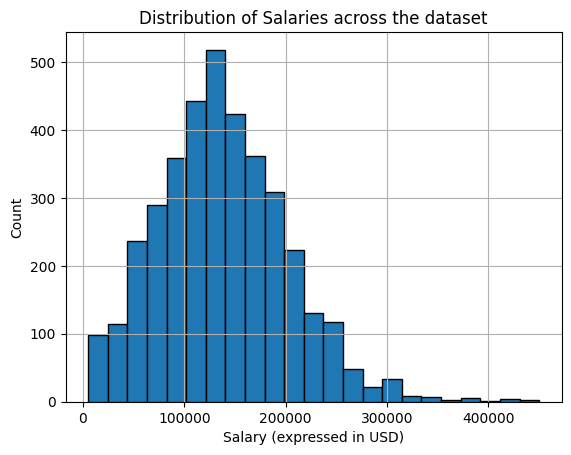

In [ ]:
df_salaries['salary_in_usd'].hist(bins=23, edgecolor='black')
plt.title('Distribution of Salaries across the dataset')
plt.xlabel('Salary (expressed in USD)')
plt.ylabel('Count')
plt.show()

2. **The dataset reveals that Senior-level positions are the most frequently required experience level for the recorded salaries.**  
  
Categorical data analysis was done on the 'experience_level' feature to arrive to this insight **(r2)**. In fact, it is evident by a simple value count that the most frequent value for required experience level in this dataset is the Senior level.

The 'experience_level' feature was also mapped to a new engineered feature called 'experience_rank' following typical hierarchy in organizations to give the data a meaningful order when it comes to experience level for the salaries.


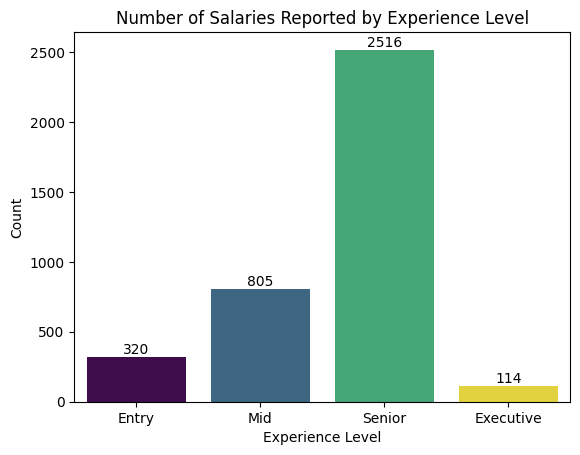

In [ ]:
# Map the experience_level values to numeric ranks, reference 1
experience_mapping = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
df_salaries['experience_rank'] = df_salaries['experience_level'].map(experience_mapping)

# Build the countplot using Seaborn library
ax = sns.countplot(x='experience_rank', data=df_salaries, palette='viridis', hue='experience_rank', legend=False)
plt.title("Number of Salaries Reported by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Count")

# Annotate the bars with count values, reference 2
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='bottom', fontsize=10)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Entry', 'Mid', 'Senior', 'Executive']) # Give meaning to the experience_rank feature
plt.show()

3. **The salaries found in the dataset are mostly associated with jobs that were fully remote or fully in person.**  
  
This insight is the result of a univariate analysis done on categorical data **(r2)** - the ratio of work done remotely. After plotting the counts for each category, we clearly see that both 0% and 100% bars have a frequency above 1500 and the 50% bar is under the 250 count.  
  
Color palette options found in Seaborn docs: https://seaborn.pydata.org/tutorial/color_palettes.html

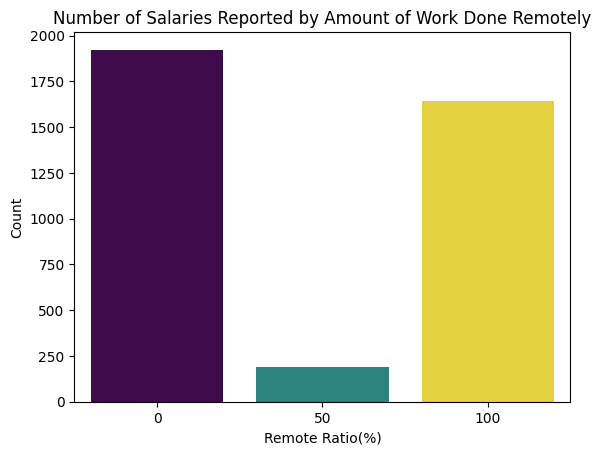

In [ ]:
sns.countplot(x='remote_ratio', data=df_salaries, palette='viridis', hue='remote_ratio', legend=False)
plt.title("Number of Salaries Reported by Amount of Work Done Remotely")
plt.xlabel("Remote Ratio(%)")
plt.ylabel("Count")
plt.show()

4. **The majority of the data found in this dataset is from employees who reside in the United States.**  
  
This insight was drawn by grouping the categorical data found in the 'employee_residence' column into 2 different groups: United States or Others. This qualifies as a Grouped-Data countplot **(r3)**. By performing this, we notice that 3004 of the 3755 rows found in the dataset are residing in the United States. That is more than 75% of the data.
  
The reason why we grouped the data in such a way was that we tried doing a count plot of the country of residence on all of the available categories for this feature and noticed that there were too many unique values with very little frequencies to display them all. Before grouping into 2 groups, there was 78 different values.

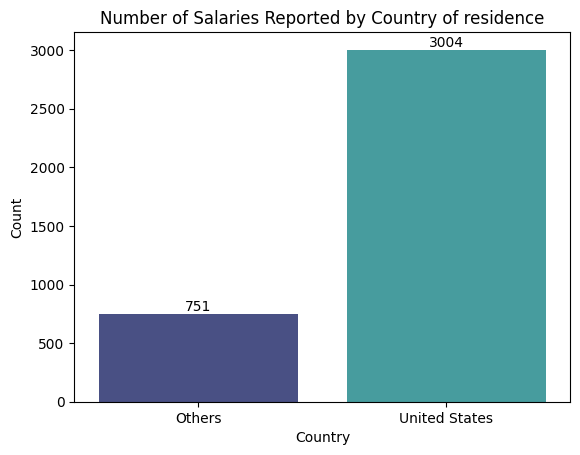

In [ ]:
# Preprocessing to group the employee_residence data into United States and Others.
df_salaries['employee_residence_cat'] = df_salaries['employee_residence'].apply(lambda x: 'United States' if x == 'US' else 'Others')
country_counts = df_salaries['employee_residence_cat'].value_counts()

# Create count plot
ax = sns.countplot(x='employee_residence_cat', data=df_salaries, palette='mako', hue='employee_residence_cat', legend=False)

# Annotate the bars with count values
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='bottom', fontsize=10)
# Add titles and labels
plt.title("Number of Salaries Reported by Country of residence")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

5. **The vast majority of the salaries reported in this dataset come are from full-time employees.**  
  
This insight comes from the categorical analysis using a countplot **(r2)** to arrive to the conclusion that 3718 out 3755 salaries reported were from full-time positions.

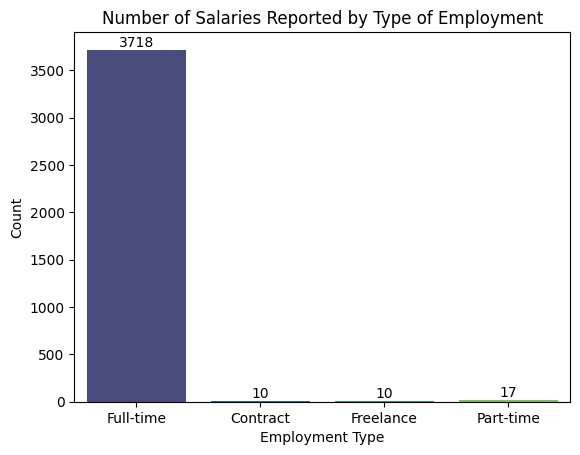

In [ ]:
# Build the countplot
ax = sns.countplot(x='employment_type', data=df_salaries, palette='viridis', hue='employment_type', legend=False)
# Annotate the bars with count values
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='bottom', fontsize=10)
plt.title("Number of Salaries Reported by Type of Employment")
plt.xlabel("Employment Type")
plt.xticks(ticks=[0, 1, 2, 3], labels=['Full-time', 'Contract', 'Freelance', 'Part-time'])
plt.ylabel("Count")
plt.show()

6. **Most of the salaries reported in this dataset came from employees of medium sized companies (101 to 500 employees).**  
  
This insight was found by creating a simple countplot for the 'company_size' feature. This is also known as categorical data analysis **(r2)**. 3153 represents more than 80% of the dataset, therefore it can be said that most of the data from this dataset comes from mid-sized companies.  
  
Also note that the size of the company was mapped to a numerical value to provide meaningful ordering of the bars. Small, Medium and Large is a natural way to order these categories in that specific order.

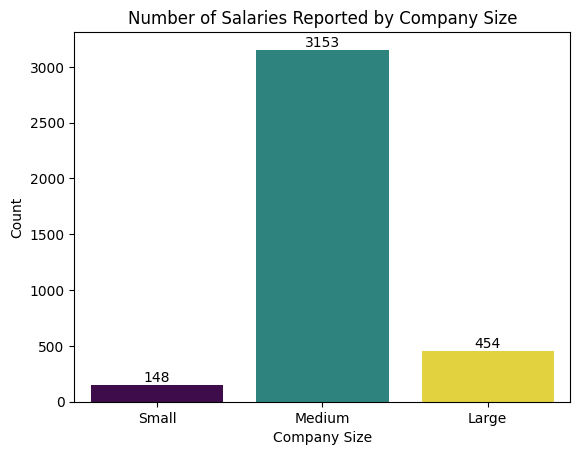

In [ ]:
# Map the company_size feature values to numeric ranks
size_mapping = {'S': 1, 'M': 2, 'L': 3}
df_salaries['company_size_rank'] = df_salaries['company_size'].map(size_mapping)

# Build the count plot
ax = sns.countplot(x='company_size_rank', data=df_salaries, palette='viridis', hue='company_size_rank', legend=False)

# Annotate the bars with count values
for p in ax.patches:
  ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='bottom', fontsize=10)

# Count plot labeling
plt.title("Number of Salaries Reported by Company Size")
plt.xlabel("Company Size")
plt.xticks(ticks=[0, 1, 2], labels = ['Small', 'Medium', 'Large'])
plt.ylabel("Count")
plt.show()



7. **In the United States, there are more yearly salaries over 135 000 USD than under 135 000 USD in this dataset, which is not the case for the rest of the World.**
  
This insight was discovered during bivariate analysis of categorical/categorical data **(r4)**. Here, the two categorical features analyzed were the salary category (over/under 135K USD) and employee residence category (United States or Other).  
  
We noticed that in the data, it is more frequent to get payed over 135 000 USD in the United States than under. This is not true for the data from the rest of the world, showing that most employees are earning under 135 000K for those regions.

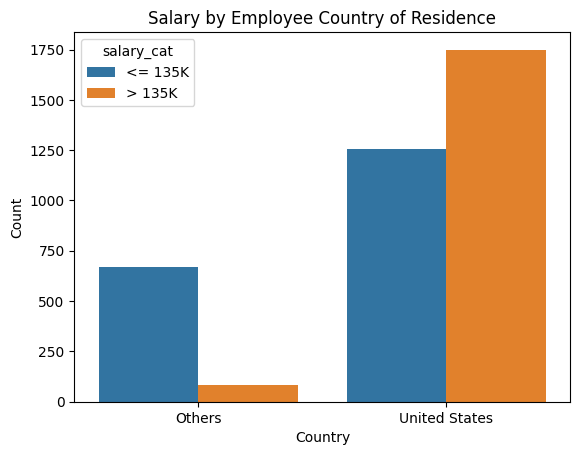

In [ ]:
# Creating a feature 'salary_cat' to separate the salaries under and over 135 000 USD
df_salaries['salary_cat'] = df_salaries['salary_in_usd'].apply(lambda x: '> 135K' if x > 135000 else '<= 135K')

# Plotting cross tabulation values for salary category and country of residence of the employee
pd.crosstab(df_salaries['employee_residence_cat'], df_salaries['salary_cat'], margins=True)

# Add titles and formating
sns.countplot(x='employee_residence_cat', hue='salary_cat', data=df_salaries)
plt.title('Salary by Employee Country of Residence')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

8. **The data indicates that mid-sized companies offer the highest median
salary to employees in Data Science compared to other company sizes.**  
  
This insight was found performing bivariate, numerical/categorical analysis on the salaries reported by the size of their respective company **(r7)**. The boxes were again ordered by natural company size and the data shows that the highest median salary is found in the 'medium' size.

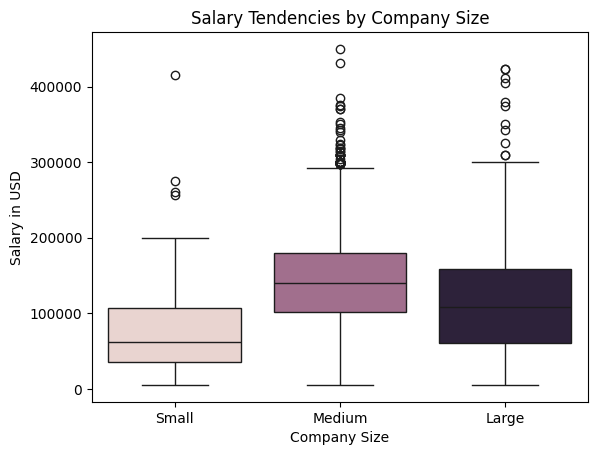

In [ ]:
# Add titles and formating
sns.boxplot(x='company_size_rank', y='salary_in_usd', hue='company_size_rank', data=df_salaries, legend=False)
plt.title('Salary Tendencies by Company Size')
plt.xlabel('Company Size')
plt.xticks(ticks=[0, 1, 2], labels=['Small', 'Medium', 'Large'])
plt.ylabel('Salary in USD')
plt.show()

9. **Executive positions have the highest median salary among all experience levels.**  
  
To analyze the relationship between salary (numerical) and experience level (categorical), I created a box plot **(r7)**. By comparing the distributions across categoires, we were able to identify that executive positions have the highest median salary among all experience levels.  
  
Furthermore, the boxes have been ordered by 'experience_rank' to give them a meaningful ordering by the level of experience required for the position.

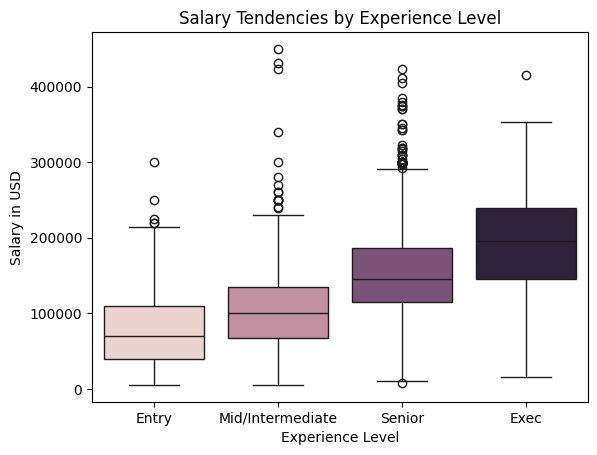

In [ ]:
# Add titles and formating
sns.boxplot(x='experience_rank', y='salary_in_usd', hue='experience_rank', data=df_salaries, legend=False)
plt.title('Salary Tendencies by Experience Level')
plt.xlabel('Experience Level')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Entry', 'Mid/Intermediate', 'Senior', 'Exec'])
plt.ylabel('Salary in USD')
plt.show()

10. **Employees who work for United States companies tend to earn higher salaries than those residing in the rest of the world.**  
  
This insight was found through bivariate, numerical/categorical analysis **(r7)** of the 'salary_in_usd' feature (numerical) and the 'company_location_grouping' feature (categorical). By analysing the box plots created during this analysis, we are able to determine that the central tendencies of the salaries reported from United States companies were greater than those from the rest of the world.  
  
The data was grouped by United States and rest of the World because a great portion of the records of the dataset were from companies of the United States (3040 out of 3755, or over 80%).


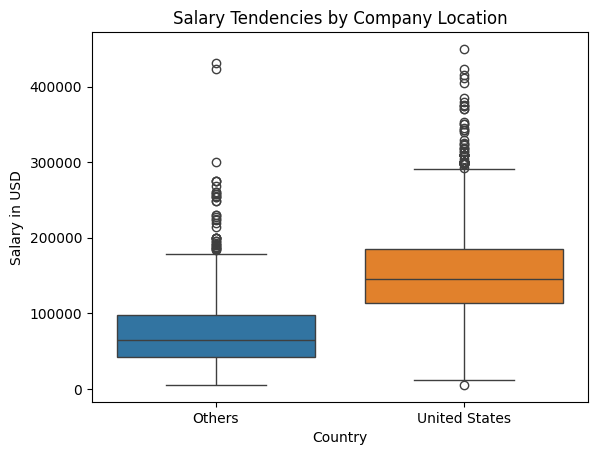

In [ ]:
df_salaries['company_location_grouping'] = df_salaries['company_location'].apply(lambda x: 'United States' if x == 'US' else 'Others')

# Add titles and formating
sns.boxplot(x='company_location_grouping', y='salary_in_usd', hue='company_location_grouping', data=df_salaries, legend=False)
plt.title('Salary Tendencies by Company Location')
plt.xlabel('Country')
plt.ylabel('Salary in USD')
plt.show()

# **Conclusion**  
  
Here are some of the findings that we made during our exploratory data analysis of the Heart Failure Prediction Dataset and the Data Science Salaries 2023 Dataset.

For the Heart Failure Prediction Dataset, we learn't about potential issues with the dataset including the age and sex distributions. Although the age distribution appears relatively normal the fact that an age above 45 can be a larger indicator of heart disease means that this dataset is heavily favored towards higher risk individuals. We also learnt that Exercise angina is disproportionately higher in men. Exercise Angina and flat ST Slope's are also closely linked to heart disease.

For the Data Science Salaries Dataset, we learnt about the trends and tendencies in the reported salaries found in the dataset at hand. At first glance, the distribution of the salaries across the dataset look normally distributed when visualized. We can also say that the dataset contained mostly salary information from Senior level positions and of employees from the United States. We were able to determine that the median salary is higher when working for a medium sized company (101 to 500 employees) and also higher when working for companies in the United States. It was also found that the median salaries increase as the required experience level increase in the order of Entry level, Mid/Intermediate level, Senior level and Executive level positions.

# **References**

1.   **ChatGPT, Mapping categorical values to numerical values.**  
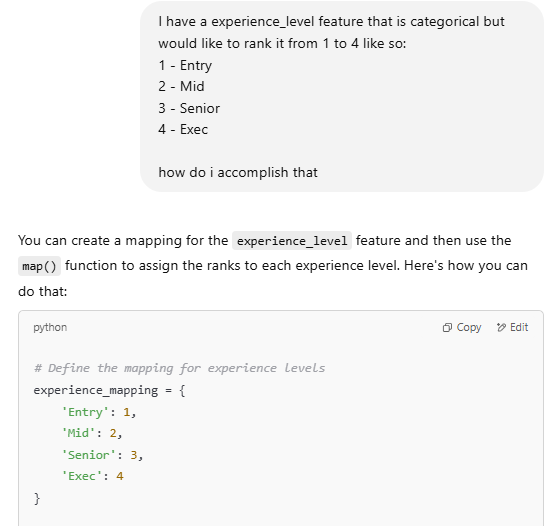
2.   **ChatGPT, How to display values at the top of bars in Seaborn Countplot.**  
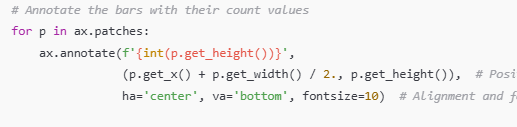
  
**3 NLM Cardiovascular risks associated with age**

Rodgers JL, Jones J, Bolleddu SI, Vanthenapalli S, Rodgers LE, Shah K, Karia K, Panguluri SK. Cardiovascular Risks Associated with Gender and Aging. J Cardiovasc Dev Dis. 2019 Apr 27;6(2):19. doi: 10.3390/jcdd6020019. PMID: 31035613; PMCID: PMC6616540.

**4 NLM Sex/gender differences in cardiovascular disease**

Mosca L, Barrett-Connor E, Wenger NK. Sex/gender differences in cardiovascular disease prevention: what a difference a decade makes. Circulation. 2011 Nov 8;124(19):2145-54. doi: 10.1161/CIRCULATIONAHA.110.968792. PMID: 22064958; PMCID: PMC3362050.

**5 Seaborn Regplot**

Seaborn.regplot#. seaborn.regplot - seaborn 0.13.2 documentation. (n.d.). https://seaborn.pydata.org/generated/seaborn.regplot.html

**6 Seaborn Histplot**
Seaborn.histplot#. seaborn.histplot - seaborn 0.13.2 documentation. (n.d.). https://seaborn.pydata.org/generated/seaborn.histplot.html

**7 StackOverflow Annotation Code**

Lee ZowersLee Zowers, JohanCJohanC, & Trenton McKinneyTrenton McKinney. (1965, August 1). How to annotate countplot with percentages by category. Stack Overflow. https://stackoverflow.com/questions/63603222/how-to-annotate-countplot-with-percentages-by-category

